In [1]:
# Import Packages
import numpy as np
import pickle
import Area_Avg as AA
import scipy.integrate as integrate
import Jacks_Functions as JF
import matplotlib as mpl
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import warnings
mpl.rc('font',size=22)
mpl.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
mpl.rc('text', usetex=True)
plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
#Load in dimensions and vars/coefficients for hybrid sigma interpolation
WACCM4_Lat = np.linspace(-90,90,96) #latitude
WACCM4_Lon = np.linspace(0,357.5,144) #longitude
WACCM4_Lev = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/WACCM4_Lev_dim.pickle','rb')) #levels

In [31]:
#read in ozone data and change to ppm units
EMs = ['01','02','03','04','05']

RCP45_Arctic_O3 = np.ma.zeros([len(EMs),720,47])
RCP45_Global_O3 = np.ma.zeros([len(EMs),720,47])
wAVD_Arctic_O3 = np.ma.zeros([len(EMs),720,47])
wAVD_Global_O3 = np.ma.zeros([len(EMs),720,47])

for i in range(len(EMs)):
    RCP45_Arctic_O3[i,:,:] = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Ozone Time Series/RCP45_Ozone_TmSrs_ArcStrato_'\
    +EMs[i]+'.pickle','rb'),encoding='latin1')
    
    RCP45_Global_O3[i,:,:] = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Ozone Time Series/RCP45_Ozone_TmSrs_GlobStrato_'\
    +EMs[i]+'.pickle','rb'),encoding='latin1')

    wAVD_Arctic_O3[i,:,:] = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Ozone Time Series/wAVD_Ozone_TmSrs_ArcStrato_'\
    +EMs[i]+'.pickle','rb'),encoding='latin1')
    
    wAVD_Global_O3[i,:,:] = pickle.load(open(\
    'Perspectives_From_WAVD_Pickled/Ozone Time Series/wAVD_Ozone_TmSrs_GlobStrato_'\
    +EMs[i]+'.pickle','rb'),encoding='latin1')

In [32]:
#note, this file is just a sample file from the full dataset. The 'lev' dimension from 
    #any WACCM .nc file
Lev = np.squeeze(Dataset('LatLon.nc').variables['lev'])*100 #in pascals

Delta_Lev = np.zeros([46])
for i in range(46):
    Delta_Lev[i] = (Lev[i+1]-Lev[i])

In [33]:
g = 980.616 
R = 2.8704e6
kboltz = 1.380044e-16 #the boltzmann constant, in units of energy/K (10e-7 Joules/K)
pa2dyn = 10 #pascal conversion constant to Dynes/cm
col2du = 1/2.687e16 

In [34]:
RCP45_Arctic_O3_ToCol = np.zeros([5,720])
RCP45_Global_O3_ToCol = np.zeros([5,720])
wAVD_Arctic_O3_ToCol = np.zeros([5,720])
wAVD_Global_O3_ToCol = np.zeros([5,720])

for i in range(5):
    for j in range(720):
        RCP45_Arctic_O3_ToCol[i,j] = (R/(kboltz*g))*col2du*pa2dyn*\
        (np.sum(RCP45_Arctic_O3[i,j,1:]*Delta_Lev))
        
        RCP45_Global_O3_ToCol[i,j] = (R/(kboltz*g))*col2du*pa2dyn*\
        (np.sum(RCP45_Global_O3[i,j,1:]*Delta_Lev))
        
        wAVD_Arctic_O3_ToCol[i,j] = (R/(kboltz*g))*col2du*pa2dyn*\
        (np.sum(wAVD_Arctic_O3[i,j,1:]*Delta_Lev))
        
        wAVD_Global_O3_ToCol[i,j] = (R/(kboltz*g))*col2du*pa2dyn*\
        (np.sum(wAVD_Global_O3[i,j,1:]*Delta_Lev))

In [35]:
#smooth data to remove seasonal average
RCP45_Arctic_O3_ToCol_Smooth = np.zeros([len(EMs),709])
RCP45_Global_O3_ToCol_Smooth = np.zeros([len(EMs),709])
wAVD_Arctic_O3_ToCol_Smooth = np.zeros([len(EMs),709])
wAVD_Global_O3_ToCol_Smooth = np.zeros([len(EMs),709])

for i in range(len(EMs)):
    RCP45_Arctic_O3_ToCol_Smooth[i,:] = JF.Moving_Avg(RCP45_Arctic_O3_ToCol[i,:],window=12)
    RCP45_Global_O3_ToCol_Smooth[i,:] = JF.Moving_Avg(RCP45_Global_O3_ToCol[i,:],window=12)
    wAVD_Arctic_O3_ToCol_Smooth[i,:] = JF.Moving_Avg(wAVD_Arctic_O3_ToCol[i,:],window=12)
    wAVD_Global_O3_ToCol_Smooth[i,:] = JF.Moving_Avg(wAVD_Global_O3_ToCol[i,:],window=12)

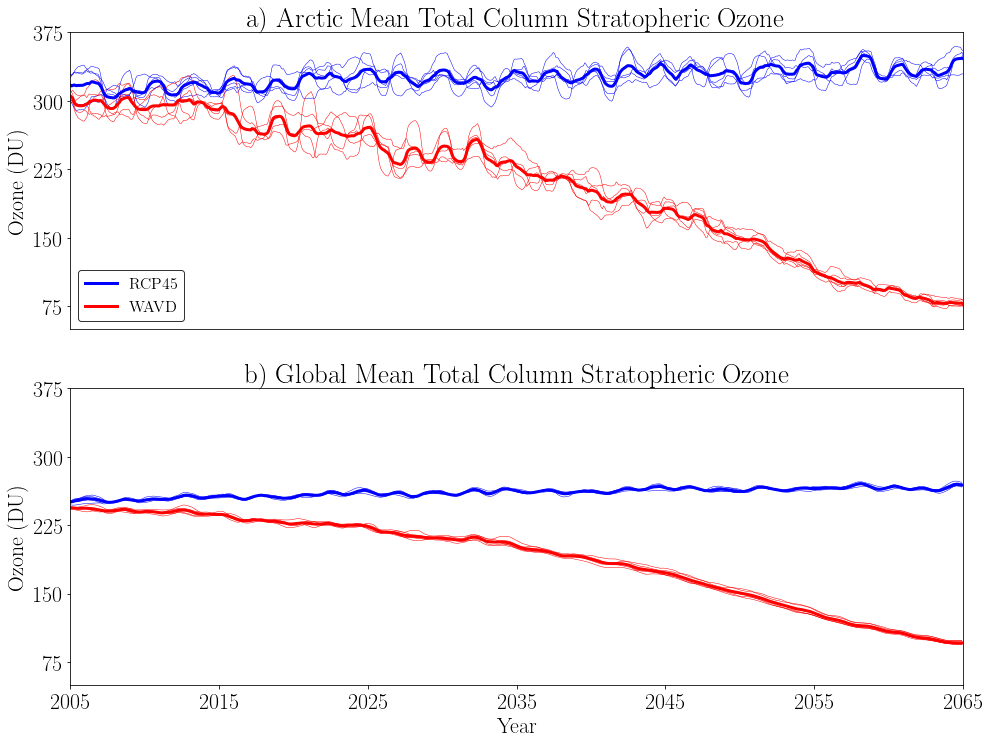

In [36]:
plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.title('a) Arctic Mean Total Column Stratopheric Ozone',fontsize=27)
for i in range(len(EMs)):
    plt.plot(RCP45_Arctic_O3_ToCol_Smooth[i,:], color = 'b', linewidth = 0.5)
    plt.plot(wAVD_Arctic_O3_ToCol_Smooth[i,:], color = 'r', linewidth = 0.5)
plt.plot(np.mean(RCP45_Arctic_O3_ToCol_Smooth,axis=0),color = 'b', linewidth=3,label='RCP45')
plt.plot(np.mean(wAVD_Arctic_O3_ToCol_Smooth,axis=0),color = 'r', linewidth=3,label='WAVD')
plt.legend().get_frame().set_linewidth(4)
plt.legend(fontsize=16,loc='lower left').get_frame().set_edgecolor('k')
plt.ylabel('Ozone (DU)')
plt.ylim(50,375)
plt.yticks(range(75,376,75))

plt.xticks([])

plt.subplot(2,1,2)
plt.title('b) Global Mean Total Column Stratopheric Ozone',fontsize=27)
for i in range(len(EMs)):
    plt.plot(RCP45_Global_O3_ToCol_Smooth[i,:], color = 'b', linewidth = 0.5)
    plt.plot(wAVD_Global_O3_ToCol_Smooth[i,:], color = 'r', linewidth = 0.5)
plt.plot(np.mean(RCP45_Global_O3_ToCol_Smooth,axis=0),color = 'b', linewidth=3,label='RCP45')
plt.plot(np.mean(wAVD_Global_O3_ToCol_Smooth,axis=0),color = 'r', linewidth=3,label='WAVD')
labels = ['2005','2015','2025','2035','2045','2055','2065']
plt.xticks(np.arange(0, 710, step=118.16), labels)
plt.xlabel('Year')
plt.ylim(50,375)
plt.yticks(range(75,376,75))
plt.ylabel('Ozone (DU)');

#plt.savefig('Arctic_O3_TmSrs.eps',bbox_inches='tight')